# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bad salzungen
Processing Record 3 of Set 1 | ulsteinvik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | daru
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | sumbawa besar
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | santa vitoria do palmar
Processing Record 15 of Set 1 | khovd
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | alotau
City not found. Skipping...
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set

In [18]:
city_data

[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 4.27,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 4.32,
  'Country': 'TF',
  'Date': 1711919911},
 {'City': 'bad salzungen',
  'Lat': 50.8167,
  'Lng': 10.2333,
  'Max Temp': 13.19,
  'Humidity': 83,
  'Cloudiness': 99,
  'Wind Speed': 0.71,
  'Country': 'DE',
  'Date': 1711919911},
 {'City': 'ulsteinvik',
  'Lat': 62.3432,
  'Lng': 5.8487,
  'Max Temp': 6.61,
  'Humidity': 95,
  'Cloudiness': 96,
  'Wind Speed': 0.45,
  'Country': 'NO',
  'Date': 1711919911},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 5.81,
  'Humidity': 56,
  'Cloudiness': 40,
  'Wind Speed': 9.26,
  'Country': 'AR',
  'Date': 1711919660},
 {'City': 'tiksi',
  'Lat': 71.6872,
  'Lng': 128.8694,
  'Max Temp': -8.78,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 8.89,
  'Country': 'RU',
  'Date': 1711919912},
 {'City': 'daru',
  'Lat': -9.0763,
  'Lng': 143.2092,
  'Max Temp': 25.92,
  'Humidity':

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.27,92,100,4.32,TF,1711919911
1,bad salzungen,50.8167,10.2333,13.19,83,99,0.71,DE,1711919911
2,ulsteinvik,62.3432,5.8487,6.61,95,96,0.45,NO,1711919911
3,ushuaia,-54.8000,-68.3000,5.81,56,40,9.26,AR,1711919660
4,tiksi,71.6872,128.8694,-8.78,84,100,8.89,RU,1711919912


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [145]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.27,92,100,4.32,TF,1711919911
1,bad salzungen,50.8167,10.2333,13.19,83,99,0.71,DE,1711919911
2,ulsteinvik,62.3432,5.8487,6.61,95,96,0.45,NO,1711919911
3,ushuaia,-54.8000,-68.3000,5.81,56,40,9.26,AR,1711919660
4,tiksi,71.6872,128.8694,-8.78,84,100,8.89,RU,1711919912


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [146]:

#Using the Time library, we transform the Unix timestamp to the date when the data was extracted.
unix_actualdate = city_data_df['Date'].iloc[0]
time_struct = time.localtime(unix_actualdate)

actualdate = time.strftime('%Y-%m-%d', time_struct)
actualdate

'2024-03-31'

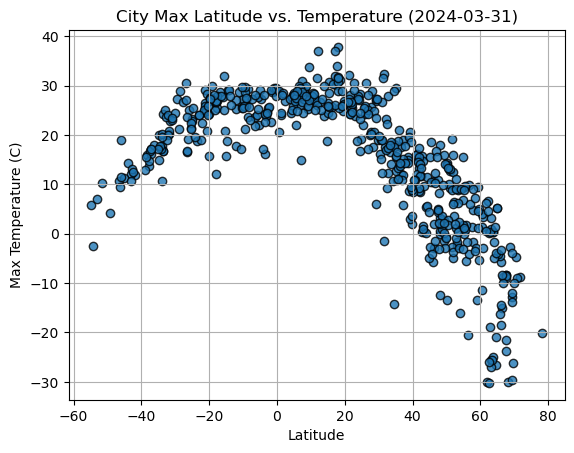

In [147]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.title(f'City Max Latitude vs. Temperature ({actualdate})')

plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

#### Latitude Vs. Humidity

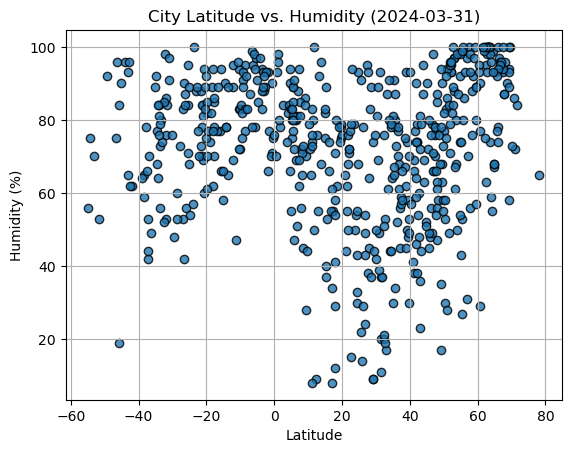

In [148]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.title(f'City Latitude vs. Humidity ({actualdate})')

plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

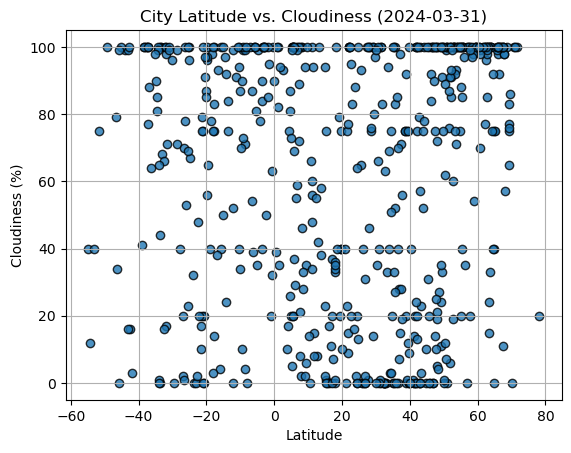

In [149]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

plt.title(f'City Latitude vs. Cloudiness ({actualdate})')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

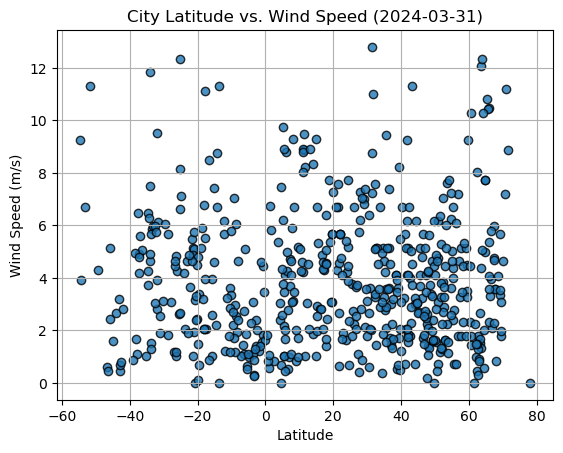

In [150]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (m/s)')

plt.title(f'City Latitude vs. Wind Speed ({actualdate})')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [151]:
# Define a function to create Linear Regression plots
def linear_regress_fun(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)

    print(f'The r-value is: {r_value}')
    plt.plot(x, slope*x + intercept, color='red')
    
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    x_range = max(x) - min(x)
    y_range = max(y) - min(y)
    x_pos = min(x) + 0.3 * x_range  
    y_pos = min(y) + 0.2 * y_range
    plt.annotate(equation,(x_pos, y_pos), fontsize = 15, color ='red')
    
    
    
    

In [152]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
north_sort_df = northern_hemi_df.sort_values('Max Temp')
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bad salzungen,50.8167,10.2333,13.19,83,99,0.71,DE,1711919911
2,ulsteinvik,62.3432,5.8487,6.61,95,96,0.45,NO,1711919911
4,tiksi,71.6872,128.8694,-8.78,84,100,8.89,RU,1711919912
7,colonia,50.9333,6.9500,12.76,86,0,6.17,DE,1711919912
12,udachny,66.4167,112.4000,-14.98,97,92,3.31,RU,1711919913


In [153]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.27,92,100,4.32,TF,1711919911
3,ushuaia,-54.8000,-68.3000,5.81,56,40,9.26,AR,1711919660
5,daru,-9.0763,143.2092,25.92,91,99,2.97,PG,1711919912
6,adamstown,-25.0660,-130.1015,23.29,68,100,12.33,PN,1711919912
8,punta arenas,-53.1500,-70.9167,7.06,70,40,6.69,CL,1711919613


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8581848150865368


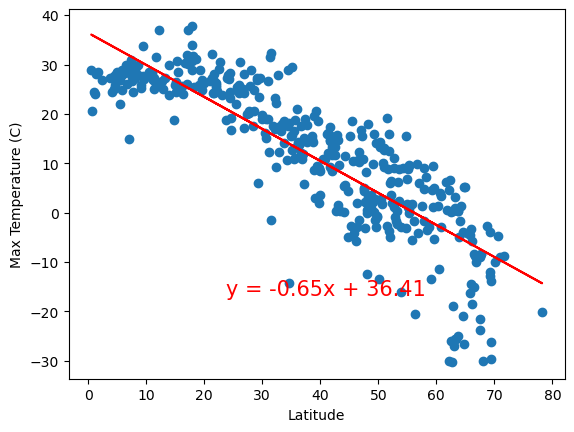

In [154]:
# Linear regression on Northern Hemisphere
linear_regress_fun(north_sort_df['Lat'], north_sort_df['Max Temp'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.savefig("output_data/Fig5.png")
plt.show()


The r-value is: 0.7296051077661342


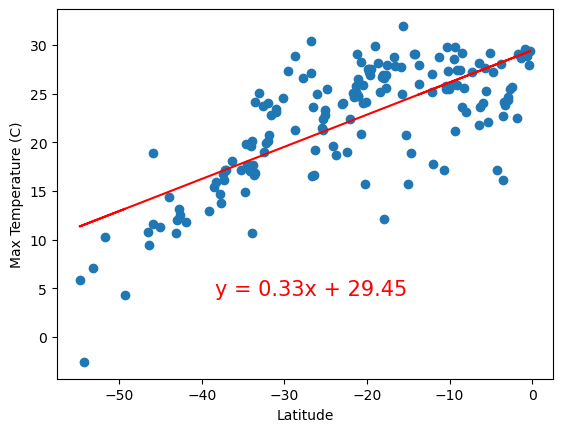

In [155]:
# Linear regression on Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
**Temperature vs. Latitude:**

- A very strong negative correlation (close to -0.8 R-value) exists between temperature and latitude in both hemispheres. 
This aligns with our expectations, as regions closer to the equator (0 latitude) receive more direct sunlight throughout the year, 
leading to warmer temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25290026330981463


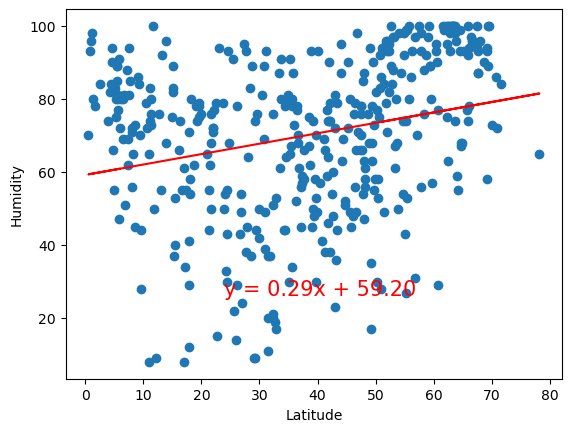

In [156]:
# Northern Hemisphere
linear_regress_fun(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')

plt.ylabel('Humidity')

plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.35108217070474507


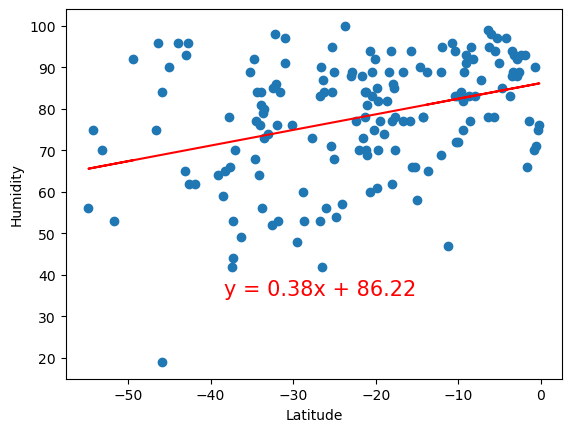

In [157]:
# Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')

plt.ylabel('Humidity')

plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** 

**Humidity vs. Latitude:**
- A weak positive correlation is observed between humidity and latitude. Areas near the equator tend to be slightly more humid, possibly due to the higher concentration of cities in these regions compared to the polar extremes (-70 and 70 latitudes). However, this correlation might be influenced by the varying number of cities included in the analysis across different latitudes.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2653303312716748


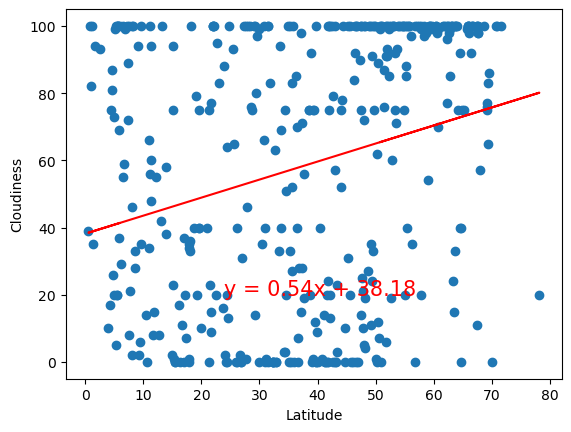

In [158]:
# Northern Hemisphere
linear_regress_fun(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.10371374202675891


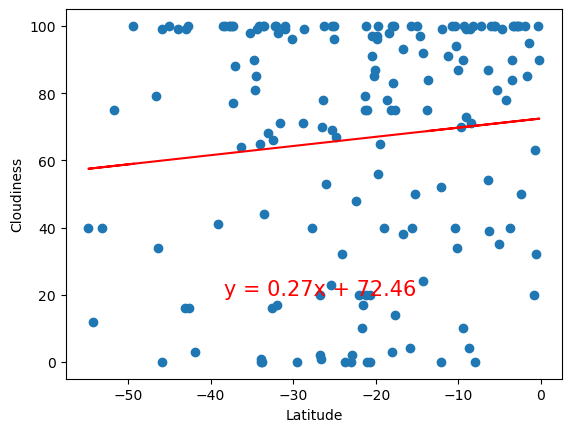

In [159]:
# Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** 

**Cloudiness vs. Latitude:**
- Linear regression analysis suggests minimal to no relationship between cloudiness and latitude (low R-value). Cloud cover is likely influenced by factors beyond latitude, and the visualizations indicate that cloudiness can be either 0% or 100% across the entire latitude range.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.022318140107994645


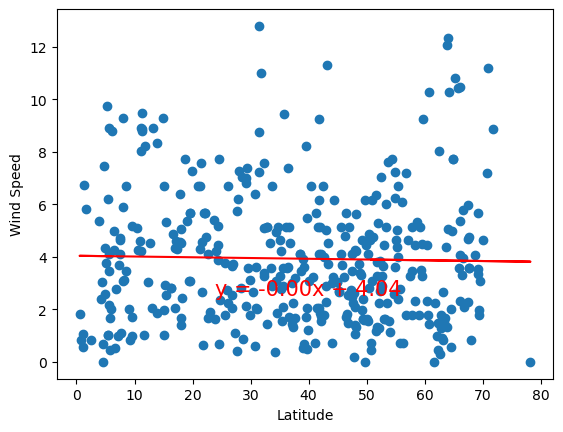

In [160]:
# Northern Hemisphere
linear_regress_fun(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.savefig("output_data/Fig11.png")
plt.show()

The r-value is: -0.24714630932908532


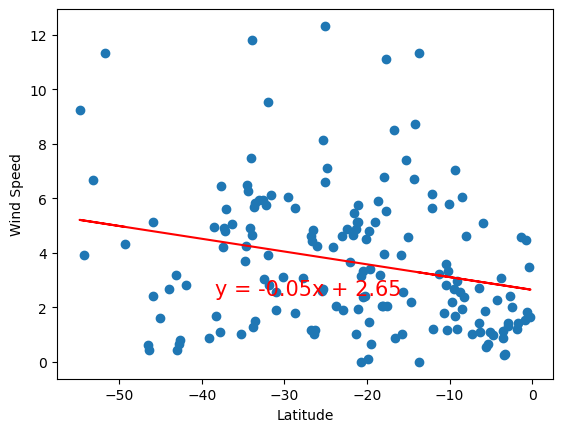

In [161]:
# Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** 

**Wind Speed vs. Latitude:**
- The analysis shows the weakest correlation between wind speed and latitude. Wind patterns are primarily determined by geographical features rather than latitude. The graphs reveal that wind speeds typically remain below 6 m/s across most latitudes.